In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('bike_rides_004.csv', sep=';')
data

,Hm,km,maxHm,max_speed,minHm,position_lat_max,position_lat_min,position_long_max,position_long_min,speed,type,endtime,starttime,rider_weight,rider_height,ride_type,duration
0,"566,6","36,14793","528,6","53,8776","289,6","48,77856824","48,70887422","9,572090087","9,469560469","19,63155608",Rennrad,16:15:33,14:17:03,76,183,Pendeln,01:58:30
1,"707,6","22,78517","484,4","55,9296",313,"48,75552194","48,71633437","9,519578638","9,506491804","25,75018",Rennrad,14:00:01,12:50:55,73,183,Training,01:09:06
2,"191,6","35,77877","323,2","39,5352","237,6","48,79818524","48,70367032","9,517305717","9,170930609","21,01617161",Trecking,19:52:13,18:10:02,73,183,Pendeln,01:42:11
3,234,"35,25931","347,6","39,132","246,8","48,79822346","48,70365221","9,517285936","9,170499528","22,13894476",Trecking,19:27:20,17:51:38,74,183,Pendeln,01:35:42
4,"447,8","22,03374",465,"57,6756","281,8","48,76649964","48,71701187","9,519576458","9,490543222","26,44992323",Rennrad,16:47:32,15:51:00,73,183,Training,00:56:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,"286,4","35,00172","383,8","39,2688","255,4","48,7983051","48,70363587","9,517290127","9,170517968","23,74666134",Trecking,20:06:00,18:39:14,73,183,Pendeln,01:26:46
550,209,"36,76133","341,6","36,378","245,4","48,79818147","48,70364903","9,523466332","9,170542862","21,8650275",Trecking,18:56:33,17:15:40,71,183,Pendeln,01:40:53
551,"758,2","41,11274","541,8","53,6436","280,4","48,80306192","48,70892434","9,588910388","9,490746735","25,92220224",Rennrad,14:27:47,12:37:34,75,183,Training,01:50:13
552,"238,8","35,03116",416,"41,8212","268,8","48,79824559","48,70364433","9,517298006","9,170953827","23,70375719",Trecking,09:06:54,07:37:38,72,183,Pendeln,01:29:16


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Hm                 554 non-null    object
 1   km                 554 non-null    object
 2   maxHm              554 non-null    object
 3   max_speed          554 non-null    object
 4   minHm              554 non-null    object
 5   position_lat_max   554 non-null    object
 6   position_lat_min   554 non-null    object
 7   position_long_max  554 non-null    object
 8   position_long_min  554 non-null    object
 9   speed              554 non-null    object
 10  type               554 non-null    object
 11  endtime            554 non-null    object
 12  starttime          554 non-null    object
 13  rider_weight       554 non-null    int64 
 14  rider_height       554 non-null    int64 
 15  ride_type          554 non-null    object
 16  duration           554 non-null    object
dt

In [3]:
# Iterate through all columns and convert strings to float for numeric columns
for column in data.columns:
    if column in ['type', 'endtime', 'starttime', 'ride_type', 'duration']:
        continue  # Skip non-numeric columns

    try:
        data[column] = data[column].str.replace(',', '.').astype(float)
    except (ValueError, AttributeError):
        # If the column can't be converted to float, skip it
        pass

In [4]:
data['type'].value_counts()

Rennrad     288
Trecking    226
MTB          40
Name: type, dtype: int64

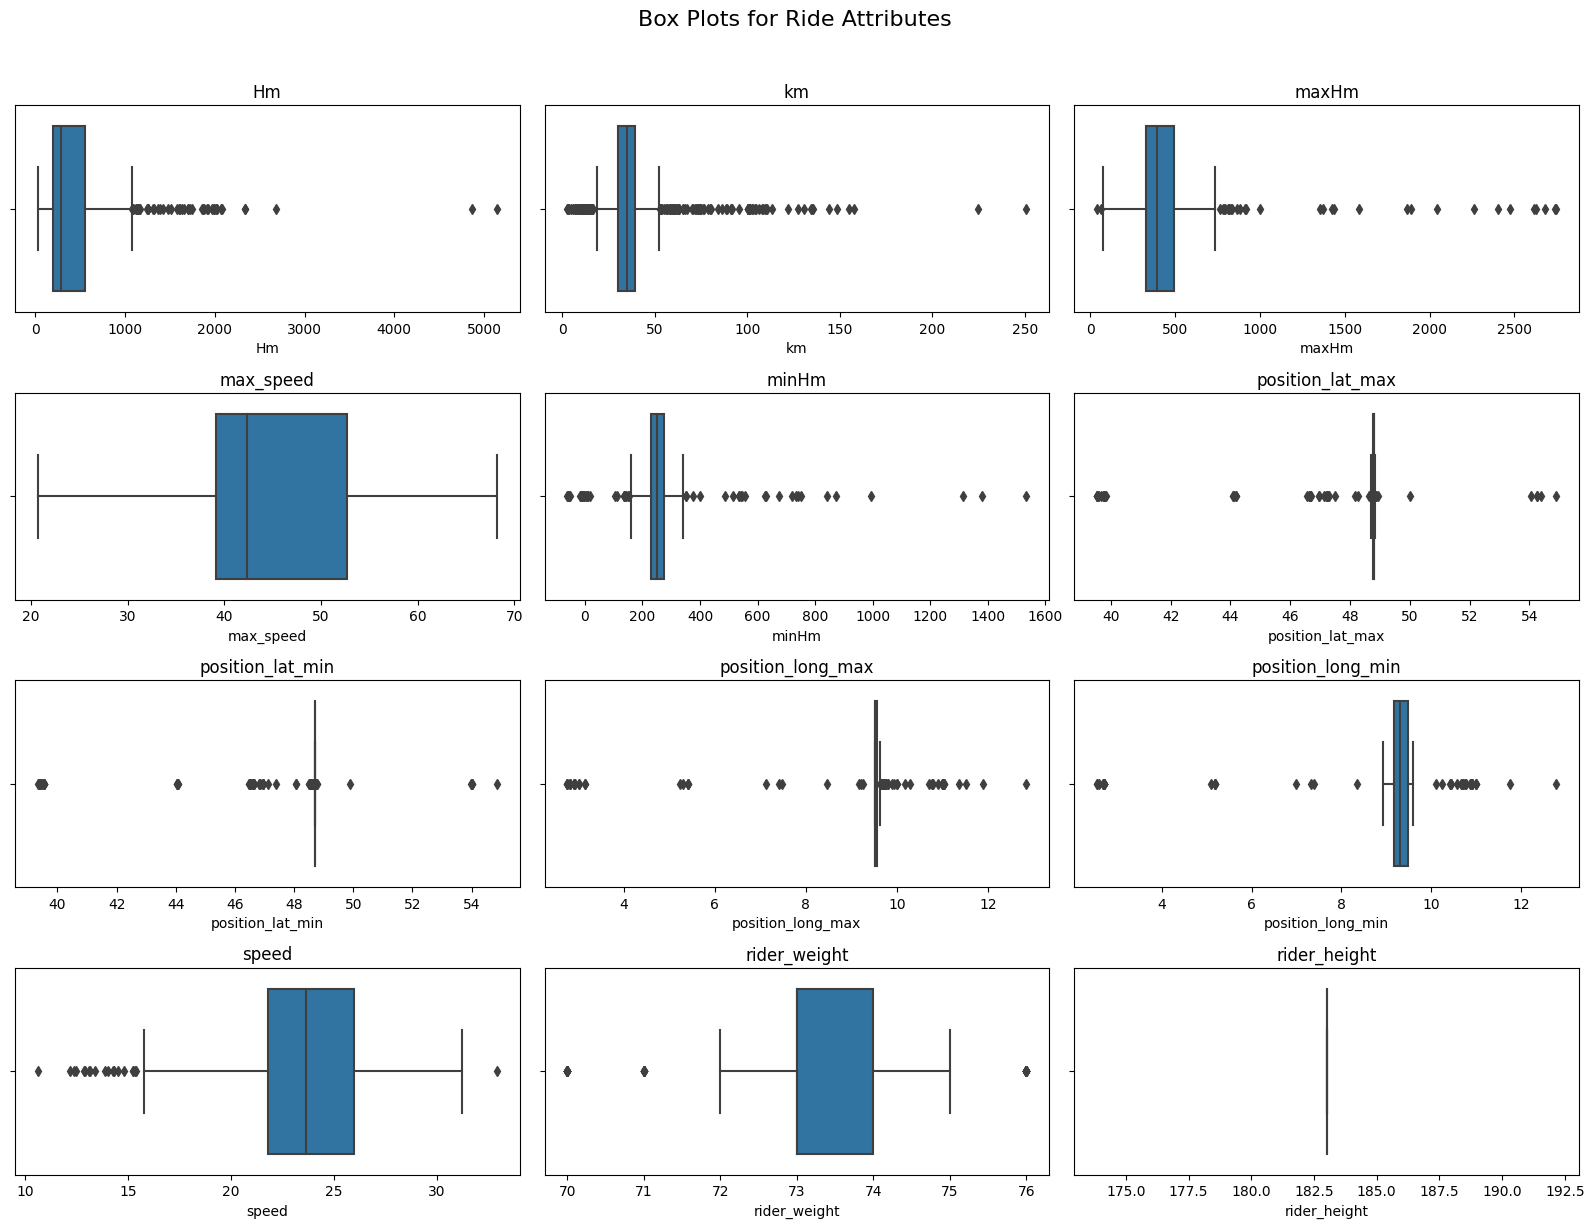

In [5]:
# Define the relevant columns
attributes = [
    'Hm', 'km', 'maxHm', 'max_speed', 'minHm', 'position_lat_max',
    'position_lat_min', 'position_long_max', 'position_long_min',
    'speed', 'rider_weight', 'rider_height'
]

# Create subplots for box plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 12))

# Create box plots for each attribute
for i, attr in enumerate(attributes):
    sns.boxplot(x=data[attr], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(attr)

# Add overall title
fig.suptitle("Box Plots for Ride Attributes", y=1.02, fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# (A) Configure
## a. a Mul6-Layer Perceptron (MLP) and

In [6]:
# Model 1: Multi-Layer Perceptron (MLP)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

## b. a Decision Tree

In [7]:
# Model 2: Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

# (B) Prepare the data appropriately for effective use by the learning methods.

In [8]:
# Convert 'type' to category data type
data['type'] = data['type'].astype('category').cat.codes
# Convert 'ride_type' to category data type
data['ride_type'] = data['ride_type'].astype('category').cat.codes

# Convert 'duration' to total minutes
data['duration'] = data['duration'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
data['duration'].rename('duration(min)', inplace=True)

# Convert 'endtime' and 'starttime' to datetime data types
data['endtime'] = pd.to_datetime(data['endtime'], format='%H:%M:%S', errors='coerce')
data['starttime'] = pd.to_datetime(data['starttime'], format='%H:%M:S', errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Hm                 554 non-null    float64       
 1   km                 554 non-null    float64       
 2   maxHm              554 non-null    float64       
 3   max_speed          554 non-null    float64       
 4   minHm              554 non-null    float64       
 5   position_lat_max   554 non-null    float64       
 6   position_lat_min   554 non-null    float64       
 7   position_long_max  554 non-null    float64       
 8   position_long_min  554 non-null    float64       
 9   speed              554 non-null    float64       
 10  type               554 non-null    int8          
 11  endtime            554 non-null    datetime64[ns]
 12  starttime          0 non-null      datetime64[ns]
 13  rider_weight       554 non-null    int64         
 14  rider_heig

In [9]:
X = data.drop(['type', 'endtime', 'starttime'], axis=1)
y = data['type']

# Encode categorical data (bike type) to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# (C) Evaluate the learning outcome with respect to the quality criteria (Accuracy, Precision, Recall, F1) and compare the two models and various configura6ons to op6mize the result.

In [10]:
def eval_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    metrics = confusion_matrix(y_test, y_pred)
    return acc, prec, rec, f1, report, metrics

In [11]:
mlp = eval_model(mlp_classifier, X_train, y_train, X_test, y_test)
dt = eval_model(dt_classifier, X_train, y_train, X_test, y_test)

print('MLP: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}'.format(*mlp[:-1]))
print('DT: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}'.format(*dt[:-1]))

MLP: Accuracy: 0.93, Precision: 0.93, Recall: 0.93, F1: 0.93
DT: Accuracy: 0.97, Precision: 0.97, Recall: 0.97, F1: 0.97


### Classification Report

In [12]:
# report
print('MLP: \n', mlp[-2])
print('DT: \n', dt[-2])

MLP: 
               precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       0.93      0.93      0.93        90
           2       0.95      0.91      0.93        69

    accuracy                           0.93       167
   macro avg       0.87      0.95      0.90       167
weighted avg       0.93      0.93      0.93       167

DT: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.99      0.96      0.97        90
           2       0.94      0.99      0.96        69

    accuracy                           0.97       167
   macro avg       0.98      0.98      0.98       167
weighted avg       0.97      0.97      0.97       167



### Comparision

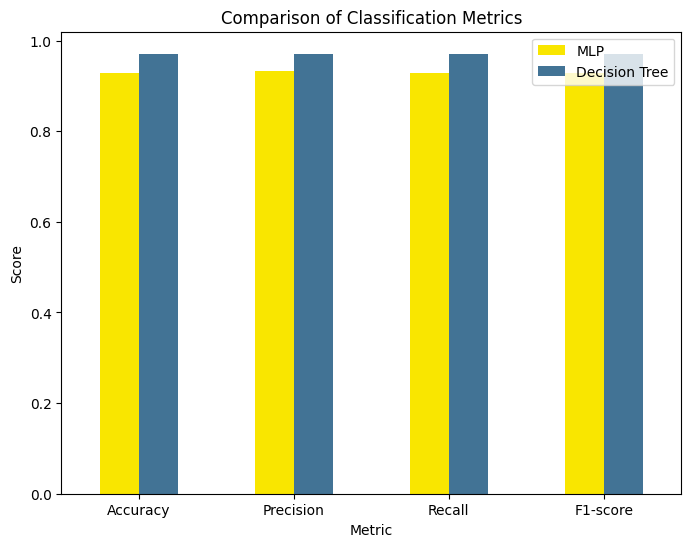

In [19]:
# Create a bar chart to compare the two models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
mlp_scores = [*mlp[:-2]]
tree_scores = [*dt[:-2]]

# Create the dataframe
df = pd.DataFrame({'MLP': mlp_scores, 'Decision Tree': tree_scores}, index=metrics)
# Plot the bar chart
df.plot.bar(rot=0, figsize=(8, 6), color=['#F9E600', '#427395'])
# Add a title
plt.title('Comparison of Classification Metrics')
# Add x and y labels
plt.xlabel('Metric')
plt.ylabel('Score')
# Show the plot
plt.show()

### Confusion Metrix

In [14]:
print('MLP: \n', mlp[-1])
print('DT: \n', dt[-1])

MLP: 
 [[ 8  0  0]
 [ 3 84  3]
 [ 0  6 63]]
DT: 
 [[ 8  0  0]
 [ 0 86  4]
 [ 0  1 68]]


[Text(0, 0.5, 'Rennrad'), Text(0, 1.5, 'Trecking'), Text(0, 2.5, 'MTB')]

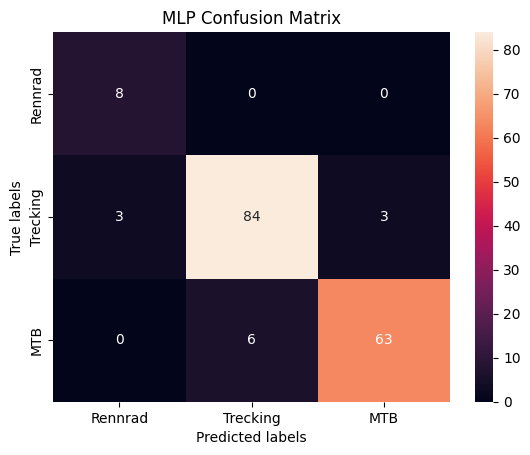

In [15]:
ax= plt.subplot()
sns.heatmap(mlp[-1], annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('MLP Confusion Matrix')
ax.xaxis.set_ticklabels(['Rennrad', 'Trecking', 'MTB'])
ax.yaxis.set_ticklabels(['Rennrad', 'Trecking', 'MTB'])

[Text(0, 0.5, 'Rennrad'), Text(0, 1.5, 'Trecking'), Text(0, 2.5, 'MTB')]

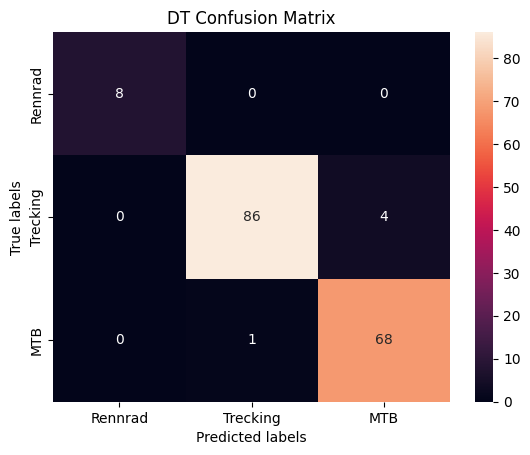

In [16]:
ax= plt.subplot()
sns.heatmap(dt[-1], annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('DT Confusion Matrix')
ax.xaxis.set_ticklabels(['Rennrad', 'Trecking', 'MTB'])
ax.yaxis.set_ticklabels(['Rennrad', 'Trecking', 'MTB'])

# Conclusion:
The Decision Tree (DT) model outperforms the Multilayer Perceptron (MLP) model in terms of accuracy, precision, recall, and F1-scores. It provides better overall classification results.
The DT model appears to be particularly effective in correctly identifying class 0, which achieved perfect precision and recall.
The MLP model has relatively lower precision for class 0, which suggests a larger number of false positives for this class.
Both models show strong performance in terms of recall for all classes, with the DT model performing slightly better.